In [1]:
import pickle
from sklearn import linear_model
import pandas as pd

In [3]:
# get the pre-processed data.
with open('data_processed_scaled.pickle', 'rb') as f:
    data = pickle.load(f)
data.head()

,AGE,SEX,MEDIC_PROB,INJURY_SURGERY,DRUG_HISTORY,AVG,CATEGORY
0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0
1,0.125000,1.0,0.0,0.0,0.0,0.616764,1.0
2,0.142857,0.0,0.0,0.0,0.0,0.371342,1.0
3,0.142857,1.0,0.0,0.0,0.0,0.736266,0.0
4,0.160714,1.0,0.0,0.0,0.0,0.726260,1.0


In [6]:
# drop all other columns except age and avg
data.drop(['SEX', 'MEDIC_PROB', 'INJURY_SURGERY', 'DRUG_HISTORY'], axis=1, inplace=True)
data.head()

,AGE,AVG,CATEGORY
0,0.000000,1.000000,0.0
1,0.125000,0.616764,1.0
2,0.142857,0.371342,1.0
3,0.142857,0.736266,0.0
4,0.160714,0.726260,1.0


In [7]:
# divide data into testing and training models
from sklearn import model_selection
X = data['AGE']
Y = data['AVG']

In [8]:
# reshaping since our data has only one column, but the linear model expects a 2D array
X = X.values.reshape(-1, 1)

In [9]:
# preprocessing the data to normalize results
from sklearn import preprocessing
X = preprocessing.MinMaxScaler().fit_transform(X)


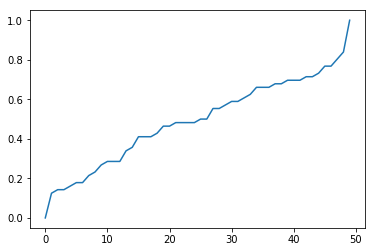

In [10]:
from matplotlib import pyplot 
%matplotlib inline

pyplot.plot(X)
pyplot.show()

In [20]:
# splititng data into training and testing data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y)
X_train.shape

(37, 1)

In [21]:
# importing and creating our regression model
regression = linear_model.LinearRegression()
# training our mdoel
regression.fit(X_train, Y_train)
# calculating our acccuracy on test data
accuracy = regression.score(X_test,Y_test)

print(accuracy)

0.845546092883


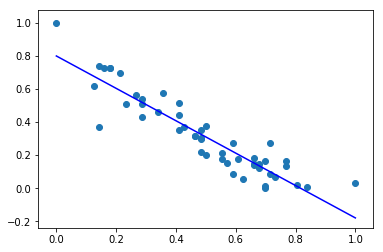

In [22]:
# plot the linear regression line
pyplot.scatter(X,Y)
pyplot.plot(X, regression.predict(X), color='b')